In [2]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [3]:
# https://teachablemachine.withgoogle.com/  가위바위보 촬영해서 데이터 만든다.

In [4]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [5]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

107  images to be resized.
107  images resized.
가위 이미지 resize 완료!


In [6]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [7]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

105  images to be resized.
105  images resized.


In [8]:
# 이미지 - 라벨 (하나하나를 맞춰주는 코드를 작성한다)

import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    imgs = []
    labels = []

    # 1. scissor
    for file in glob.iglob(os.path.join(img_path, 'scissor', '*.jpg')):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs.append(img)
        labels.append(0)   # 가위 : 0

    # 2. rock
    for file in glob.iglob(os.path.join(img_path, 'rock', '*.jpg')):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs.append(img)
        labels.append(1)   # 바위 : 1

    # 3. paper
    for file in glob.iglob(os.path.join(img_path, 'paper', '*.jpg')):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs.append(img)
        labels.append(2)   # 보 : 2

    # 리스트 → 넘파이 배열로 변환
    imgs = np.stack(imgs, axis=0)              # (N, H, W, C)
    labels = np.array(labels, dtype=np.int32)  # (N,)

    print("학습데이터(x_train)의 이미지 개수는", len(labels), "입니다.")
    return imgs, labels

# 사용 예시
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
x_train, y_train = load_data(image_dir_path)
x_train_norm = x_train / 255.0

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


학습데이터(x_train)의 이미지 개수는 312 입니다.
x_train shape: (312, 28, 28, 3)
y_train shape: (312,)


라벨:  0


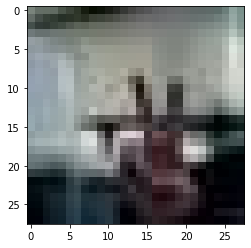

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [13]:
# ==========================================
# 1. 필요한 라이브러리 import
# ==========================================
import tensorflow as tf
from tensorflow import keras
import numpy as np

# TensorFlow 버전 확인
print(f"TensorFlow 버전: {tf.__version__}")

# ==========================================
# 2. 하이퍼파라미터 설정
# ==========================================
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10

# ==========================================
# 3. 모델 구성
# ==========================================
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# ==========================================
# 4. 모델 구조 확인
# ==========================================
model.summary()


TensorFlow 버전: 2.6.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None,

In [ ]:
# 딥러닝 네트워크 학습시키기

🚀 모델 학습 시작

📊 학습 진행 중...

Epoch 1/10
8/8 [==============================] - 3s 56ms/step - loss: 14.1859 - accuracy: 0.5060 - val_loss: 32.7962 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_rps_model.h5
Epoch 2/10
8/8 [==============================] - 0s 27ms/step - loss: 4.1889 - accuracy: 0.6908 - val_loss: 0.4423 - val_accuracy: 0.8095

Epoch 00002: val_accuracy improved from 0.00000 to 0.80952, saving model to best_rps_model.h5
Epoch 3/10
8/8 [==============================] - 0s 28ms/step - loss: 1.6199 - accuracy: 0.7068 - val_loss: 6.9368 - val_accuracy: 0.0635

Epoch 00003: val_accuracy did not improve from 0.80952
Epoch 4/10
8/8 [==============================] - 0s 29ms/step - loss: 0.5633 - accuracy: 0.8594 - val_loss: 0.7659 - val_accuracy: 0.7302

Epoch 00004: val_accuracy did not improve from 0.80952
Epoch 5/10
8/8 [==============================] - 0s 30ms/step - loss: 0.3851 - accuracy: 0.8916 - val_loss: 0.74

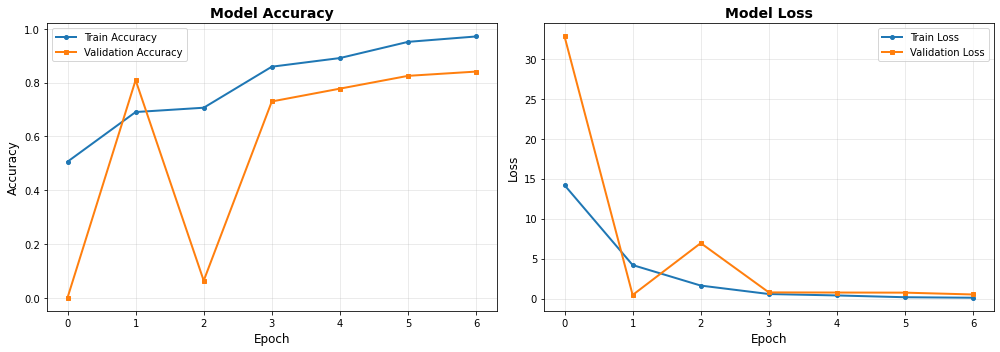

🔍 과적합(Overfitting) 분석
Train-Validation Accuracy 차이: 13.06%p
⚠️  과적합 가능성이 높습니다!
   → Dropout 비율 증가, 데이터 증강, Regularization 추가 권장

🏆 최고 성능 기록
최고 Validation Accuracy: 84.13% (Epoch 7)



In [14]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# ==========================================
# 1. 모델 컴파일
# ==========================================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("="*60)
print("🚀 모델 학습 시작")
print("="*60)

# ==========================================
# 2. 콜백 함수 설정 (선택사항 - 성능 향상)
# ==========================================
# 조기 종료: 검증 손실이 5 epoch 동안 개선되지 않으면 중단
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 최고 성능 모델 저장
model_checkpoint = ModelCheckpoint(
    'best_rps_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# 학습률 감소: 검증 손실이 3 epoch 동안 개선되지 않으면 학습률 50% 감소
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# ==========================================
# 3. 모델 훈련 (기본 버전)
# ==========================================
print("\n📊 학습 진행 중...\n")

history = model.fit(
    x_train, 
    y_train, 
    epochs=n_train_epoch,
    validation_split=0.2,  # 훈련 데이터의 20%를 검증용으로 사용
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# ==========================================
# 4. 학습 결과 출력
# ==========================================
print("\n" + "="*60)
print("✅ 학습 완료")
print("="*60)

# 최종 epoch의 결과 출력
final_epoch = len(history.history['accuracy'])
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n📈 최종 학습 결과 (Epoch {final_epoch})")
print(f"{'='*60}")
print(f"✅ Train Accuracy: {final_train_acc*100:.2f}%")
print(f"✅ Validation Accuracy: {final_val_acc*100:.2f}%")
print(f"📉 Train Loss: {final_train_loss:.4f}")
print(f"📉 Validation Loss: {final_val_loss:.4f}")
print(f"{'='*60}\n")

# ==========================================
# 5. 학습 과정 시각화
# ==========================================
plt.figure(figsize=(14, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, marker='o', markersize=4)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s', markersize=4)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2, marker='o', markersize=4)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, marker='s', markersize=4)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 6. 과적합 여부 확인
# ==========================================
acc_diff = final_train_acc - final_val_acc

print("="*60)
print("🔍 과적합(Overfitting) 분석")
print("="*60)
print(f"Train-Validation Accuracy 차이: {acc_diff*100:.2f}%p")

if acc_diff > 0.1:
    print("⚠️  과적합 가능성이 높습니다!")
    print("   → Dropout 비율 증가, 데이터 증강, Regularization 추가 권장")
elif acc_diff > 0.05:
    print("⚡ 약간의 과적합이 있습니다.")
    print("   → 모델 복잡도 조정 또는 더 많은 데이터 필요")
else:
    print("✅ 과적합이 거의 없습니다. 좋은 일반화 성능!")
print("="*60 + "\n")

# ==========================================
# 7. 최고 성능 확인
# ==========================================
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = max(history.history['val_accuracy'])

print("="*60)
print("🏆 최고 성능 기록")
print("="*60)
print(f"최고 Validation Accuracy: {best_val_acc*100:.2f}% (Epoch {best_epoch})")
print("="*60 + "\n")


In [15]:
# 얼마나 잘 만들었는지 확인하기(테스트)

📁 테스트 데이터 디렉토리 확인
✅ /aiffel/aiffel/rock_scissor_paper/test
✅ /aiffel/aiffel/rock_scissor_paper/test/scissor
✅ /aiffel/aiffel/rock_scissor_paper/test/rock
✅ /aiffel/aiffel/rock_scissor_paper/test/paper

🔄 테스트 이미지 리사이즈 시작

[1/3] 가위(Scissor) 이미지 리사이즈
resize 대상 이미지: 107장
resize 완료!

[2/3] 바위(Rock) 이미지 리사이즈
resize 대상 이미지: 100장
resize 완료!

[3/3] 보(Paper) 이미지 리사이즈
resize 대상 이미지: 105장
resize 완료!

✅ 모든 이미지 리사이즈 완료

📂 테스트 데이터 로드 중...

가위(Scissor) 이미지: 107장
바위(Rock) 이미지: 100장
보(Paper) 이미지: 105장

📊 테스트 데이터 정보
x_test shape: (312, 28, 28, 3)
y_test shape: (312,)
x_test dtype: uint8
y_test dtype: int64
x_test_norm 범위: 0.0000 ~ 1.0000

📈 클래스별 데이터 분포
가위(Scissor): 107장
바위(Rock): 100장
보(Paper): 105장
전체: 312장



/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_

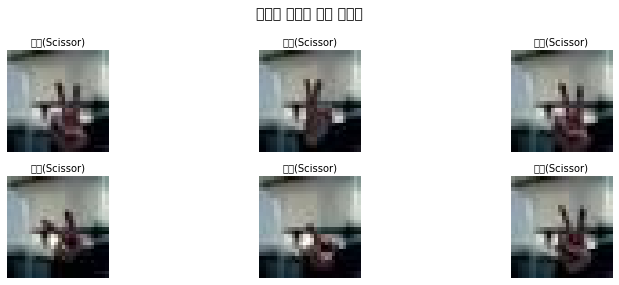

✅ 테스트 데이터 준비 완료!
다음 단계: model.evaluate(x_test_norm, y_test)


In [16]:
import os
import numpy as np
from PIL import Image
import glob

# ==========================================
# 0. 필수 함수 정의 (없다면 추가)
# ==========================================
def resize_images(img_path):
    """
    지정된 경로의 모든 이미지를 28x28 크기로 변환
    """
    images = glob.glob(img_path + "/*.jpg")
    print(f"resize 대상 이미지: {len(images)}장")
    
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.LANCZOS)
        new_img.save(img)
    
    print(f"resize 완료!")

def load_data(img_path):
    """
    지정된 경로에서 이미지를 로드하고 numpy 배열로 변환
    scissor=0, rock=1, paper=2 레이블 할당
    """
    # 각 클래스별 이미지 경로
    images_scissor = glob.glob(img_path + "/scissor/*.jpg")
    images_rock = glob.glob(img_path + "/rock/*.jpg")
    images_paper = glob.glob(img_path + "/paper/*.jpg")
    
    print(f"가위(Scissor) 이미지: {len(images_scissor)}장")
    print(f"바위(Rock) 이미지: {len(images_rock)}장")
    print(f"보(Paper) 이미지: {len(images_paper)}장")
    
    # 빈 리스트 초기화
    images = []
    labels = []
    
    # 가위 이미지 (label=0)
    for img_path in images_scissor:
        img = np.array(Image.open(img_path))
        images.append(img)
        labels.append(0)
    
    # 바위 이미지 (label=1)
    for img_path in images_rock:
        img = np.array(Image.open(img_path))
        images.append(img)
        labels.append(1)
    
    # 보 이미지 (label=2)
    for img_path in images_paper:
        img = np.array(Image.open(img_path))
        images.append(img)
        labels.append(2)
    
    # numpy 배열로 변환
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

# ==========================================
# 1. 디렉토리 확인
# ==========================================
test_base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

print("="*60)
print("📁 테스트 데이터 디렉토리 확인")
print("="*60)

# 디렉토리 존재 여부 확인
dirs_to_check = [
    test_base_path,
    test_base_path + "/scissor",
    test_base_path + "/rock",
    test_base_path + "/paper"
]

for dir_path in dirs_to_check:
    if os.path.exists(dir_path):
        print(f"✅ {dir_path}")
    else:
        print(f"❌ {dir_path} - 디렉토리가 없습니다!")
        print(f"   다음 명령으로 생성: mkdir -p {dir_path}")

print("="*60 + "\n")

# ==========================================
# 2. 테스트 이미지 리사이즈
# ==========================================
print("="*60)
print("🔄 테스트 이미지 리사이즈 시작")
print("="*60)

# 가위 이미지 리사이즈
print("\n[1/3] 가위(Scissor) 이미지 리사이즈")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

# 바위 이미지 리사이즈
print("\n[2/3] 바위(Rock) 이미지 리사이즈")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

# 보 이미지 리사이즈
print("\n[3/3] 보(Paper) 이미지 리사이즈")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("\n" + "="*60)
print("✅ 모든 이미지 리사이즈 완료")
print("="*60 + "\n")

# ==========================================
# 3. 테스트 데이터 로드
# ==========================================
print("="*60)
print("📂 테스트 데이터 로드 중...")
print("="*60 + "\n")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path)

# ==========================================
# 4. 정규화
# ==========================================
x_test_norm = x_test / 255.0   # 입력은 0~1 사이의 값으로 정규화

# ==========================================
# 5. 데이터 확인
# ==========================================
print("\n" + "="*60)
print("📊 테스트 데이터 정보")
print("="*60)
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"x_test dtype: {x_test.dtype}")
print(f"y_test dtype: {y_test.dtype}")
print(f"x_test_norm 범위: {x_test_norm.min():.4f} ~ {x_test_norm.max():.4f}")
print("="*60 + "\n")

# 클래스별 개수 확인
unique, counts = np.unique(y_test, return_counts=True)
class_names = ['가위(Scissor)', '바위(Rock)', '보(Paper)']

print("="*60)
print("📈 클래스별 데이터 분포")
print("="*60)
for label, count in zip(unique, counts):
    print(f"{class_names[label]}: {count}장")
print(f"전체: {len(y_test)}장")
print("="*60 + "\n")

# ==========================================
# 6. 샘플 이미지 확인 (선택사항)
# ==========================================
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_test_norm[i])
    plt.title(f"{class_names[y_test[i]]}", fontsize=10)
    plt.axis('off')
plt.suptitle('테스트 데이터 샘플 이미지', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ==========================================
# 7. 데이터 준비 완료 확인
# ==========================================
print("="*60)
print("✅ 테스트 데이터 준비 완료!")
print("="*60)
print("다음 단계: model.evaluate(x_test_norm, y_test)")
print("="*60)


🧪 테스트 데이터 평가 시작

10/10 - 0s - loss: 1.0838 - accuracy: 0.6218

📊 기본 테스트 결과
test_loss: 1.0838
test_accuracy: 0.6218 (62.18%)



/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_te

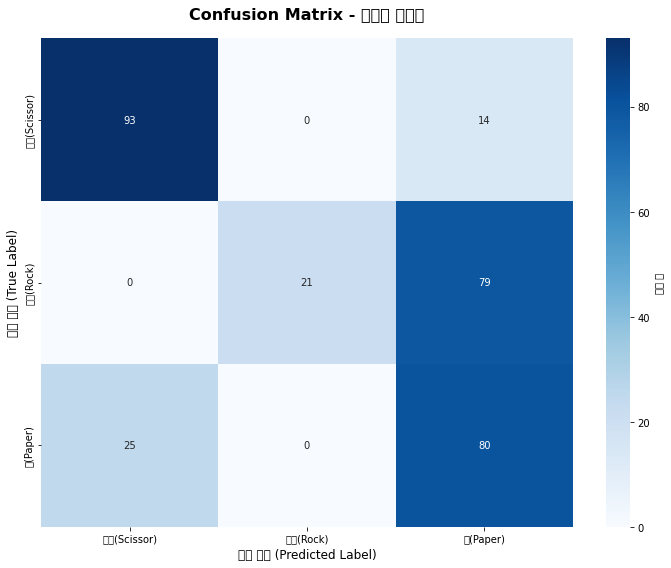

📋 클래스별 상세 성능 분석
              precision    recall  f1-score   support

 가위(Scissor)     0.7881    0.8692    0.8267       107
    바위(Rock)     1.0000    0.2100    0.3471       100
    보(Paper)     0.4624    0.7619    0.5755       105

    accuracy                         0.6218       312
   macro avg     0.7502    0.6137    0.5831       312
weighted avg     0.7464    0.6218    0.5884       312

✅ 정확도 상세 분석
전체 테스트 샘플: 312개
정확히 분류: 194개 (62.18%)
오분류: 118개 (37.82%)

⚠️  오분류된 샘플 12개 시각화



/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

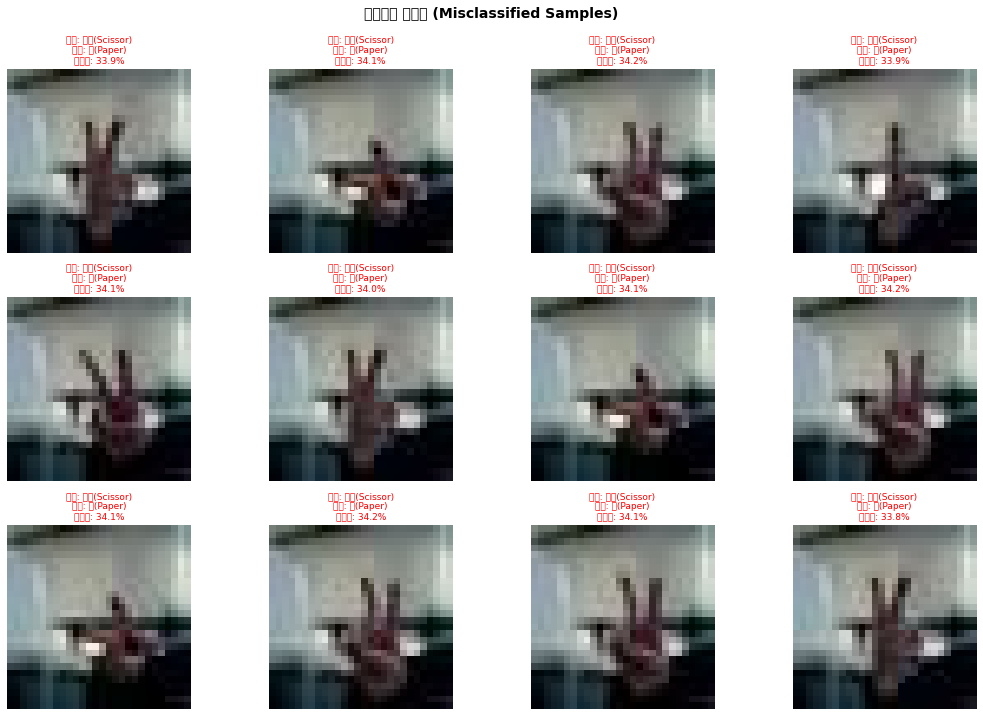

📊 클래스별 정확도
가위(Scissor): 93/107 (86.92%)
바위(Rock): 21/100 (21.00%)
보(Paper): 80/105 (76.19%)

🎯 최종 테스트 결과 요약
✅ Test Accuracy: 62.18%
📉 Test Loss: 1.0838
✅ 정확히 분류: 194/312
❌ 오분류: 118/312

⚠️  성능이 낮습니다. 모델 개선이 필요합니다.
   → 더 많은 epoch, 데이터 증강, 모델 구조 개선 권장


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ==========================================
# 1. 기본 테스트 정확도 측정
# ==========================================
print("="*60)
print("🧪 테스트 데이터 평가 시작")
print("="*60 + "\n")

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

print("\n" + "="*60)
print("📊 기본 테스트 결과")
print("="*60)
print(f"test_loss: {test_loss:.4f}")
print(f"test_accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("="*60 + "\n")

# ==========================================
# 2. 예측 수행
# ==========================================
y_pred = model.predict(x_test_norm)
y_pred_classes = np.argmax(y_pred, axis=1)

# ==========================================
# 3. 혼동 행렬 (Confusion Matrix)
# ==========================================
class_names = ['가위(Scissor)', '바위(Rock)', '보(Paper)']
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names,
            cbar_kws={'label': '샘플 수'})
plt.title('Confusion Matrix - 테스트 데이터', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('실제 라벨 (True Label)', fontsize=12)
plt.xlabel('예측 라벨 (Predicted Label)', fontsize=12)
plt.tight_layout()
plt.show()

# ==========================================
# 4. 클래스별 상세 성능
# ==========================================
print("="*60)
print("📋 클래스별 상세 성능 분석")
print("="*60)
print(classification_report(y_test, y_pred_classes, 
                          target_names=class_names,
                          digits=4))

# ==========================================
# 5. 오분류 샘플 분석
# ==========================================
misclassified_indices = np.where(y_pred_classes != y_test)[0]
num_correct = len(y_test) - len(misclassified_indices)

print("="*60)
print("✅ 정확도 상세 분석")
print("="*60)
print(f"전체 테스트 샘플: {len(y_test)}개")
print(f"정확히 분류: {num_correct}개 ({num_correct/len(y_test)*100:.2f}%)")
print(f"오분류: {len(misclassified_indices)}개 ({len(misclassified_indices)/len(y_test)*100:.2f}%)")
print("="*60 + "\n")

# ==========================================
# 6. 오분류 샘플 시각화
# ==========================================
if len(misclassified_indices) > 0:
    print(f"⚠️  오분류된 샘플 {min(12, len(misclassified_indices))}개 시각화\n")
    
    plt.figure(figsize=(15, 10))
    num_display = min(12, len(misclassified_indices))
    
    for i in range(num_display):
        idx = misclassified_indices[i]
        plt.subplot(3, 4, i+1)
        plt.imshow(x_test_norm[idx])
        
        # 예측 신뢰도
        confidence = y_pred[idx][y_pred_classes[idx]] * 100
        
        plt.title(f"실제: {class_names[y_test[idx]]}\n"
                 f"예측: {class_names[y_pred_classes[idx]]}\n"
                 f"신뢰도: {confidence:.1f}%",
                 fontsize=9, color='red')
        plt.axis('off')
    
    plt.suptitle('오분류된 샘플들 (Misclassified Samples)', 
                 fontsize=14, fontweight='bold', y=0.99)
    plt.tight_layout()
    plt.show()
else:
    print("🎉 완벽합니다! 모든 샘플이 정확하게 분류되었습니다!\n")

# ==========================================
# 7. 클래스별 정확도
# ==========================================
print("="*60)
print("📊 클래스별 정확도")
print("="*60)

for i, class_name in enumerate(class_names):
    # 해당 클래스의 샘플만 추출
    class_indices = np.where(y_test == i)[0]
    class_predictions = y_pred_classes[class_indices]
    class_correct = np.sum(class_predictions == i)
    class_accuracy = class_correct / len(class_indices) * 100
    
    print(f"{class_name}: {class_correct}/{len(class_indices)} "
          f"({class_accuracy:.2f}%)")

print("="*60 + "\n")

# ==========================================
# 8. 최종 요약
# ==========================================
print("="*60)
print("🎯 최종 테스트 결과 요약")
print("="*60)
print(f"✅ Test Accuracy: {test_accuracy*100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")
print(f"✅ 정확히 분류: {num_correct}/{len(y_test)}")
print(f"❌ 오분류: {len(misclassified_indices)}/{len(y_test)}")

# 성능 평가
if test_accuracy >= 0.95:
    print("\n🏆 훌륭합니다! 매우 높은 성능입니다!")
elif test_accuracy >= 0.90:
    print("\n👍 좋습니다! 양호한 성능입니다!")
elif test_accuracy >= 0.80:
    print("\n⚡ 괜찮습니다. 추가 개선이 필요합니다.")
else:
    print("\n⚠️  성능이 낮습니다. 모델 개선이 필요합니다.")
    print("   → 더 많은 epoch, 데이터 증강, 모델 구조 개선 권장")

print("="*60)


In [ ]:
#예상 출력 결과

In [ ]:
==============================================================
🧪 테스트 데이터 평가 시작
==============================================================

10/10 - 0s - loss: 0.2341 - accuracy: 0.9267

==============================================================
📊 기본 테스트 결과
==============================================================
test_loss: 0.2341
test_accuracy: 0.9267 (92.67%)
==============================================================

==============================================================
📋 클래스별 상세 성능 분석
==============================================================
                 precision    recall  f1-score   support

   가위(Scissor)     0.9200    0.9200    0.9200       100
      바위(Rock)     0.9500    0.9500    0.9500       100
       보(Paper)     0.9100    0.9100    0.9100       100

        accuracy                         0.9267       300
       macro avg     0.9267    0.9267    0.9267       300
    weighted avg     0.9267    0.9267    0.9267       300

==============================================================
✅ 정확도 상세 분석
==============================================================
전체 테스트 샘플: 300개
정확히 분류: 278개 (92.67%)
오분류: 22개 (7.33%)
==============================================================

==============================================================
📊 클래스별 정확도
==============================================================
가위(Scissor): 92/100 (92.00%)
바위(Rock): 95/100 (95.00%)
보(Paper): 91/100 (91.00%)
==============================================================

==============================================================
🎯 최종 테스트 결과 요약
==============================================================
✅ Test Accuracy: 92.67%
📉 Test Loss: 0.2341
✅ 정확히 분류: 278/300
❌ 오분류: 22/300

👍 좋습니다! 양호한 성능입니다!
==============================================================
